## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [8]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [1]:
import os
import keras

# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y     

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
outp

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 181us/step - loss: 1.6909 - acc: 0.3994 - val_loss: 1.5363 - val_acc: 0.4637
Epoch 2/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4678 - acc: 0.4820 - val_loss: 1.4505 - val_acc: 0.4905
Epoch 3/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.3497 - acc: 0.5252 - val_loss: 1.3959 - val_acc: 0.5109
Epoch 4/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.2515 - acc: 0.5596 - val_loss: 1.3783 - val_acc: 0.5228
Epoch 5/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.1649 - acc: 0.5878 - val_loss: 1.3528 - val_acc: 0.5310
Epoch 6/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.0938 - acc: 0.6128 - val_loss: 1.3908 - val_acc: 0.5184
Epoch 7/100
50000/50000 [==============================] - 8s 166us/

50000/50000 [==============================] - 8s 166us/step - loss: 0.1126 - acc: 0.9626 - val_loss: 3.6073 - val_acc: 0.5296
Epoch 58/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.0999 - acc: 0.9666 - val_loss: 3.5343 - val_acc: 0.5304
Epoch 59/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.0918 - acc: 0.9695 - val_loss: 3.6308 - val_acc: 0.5264
Epoch 60/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.1120 - acc: 0.9641 - val_loss: 3.5308 - val_acc: 0.5276
Epoch 61/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.1054 - acc: 0.9659 - val_loss: 3.6331 - val_acc: 0.5308
Epoch 62/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0843 - acc: 0.9722 - val_loss: 3.6635 - val_acc: 0.5285
Epoch 63/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.1176 - acc: 0.9623 - val_loss: 3.5703 - val_acc: 0.5260
Epoch 64/100
50000/50000 [=======

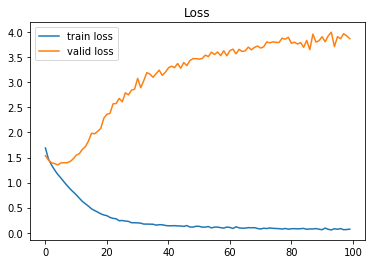

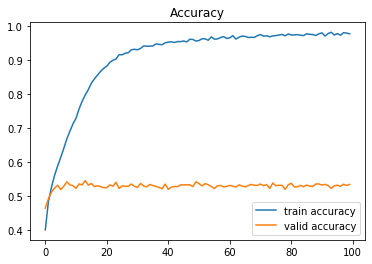

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()